In [4]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
         'harga' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame (pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


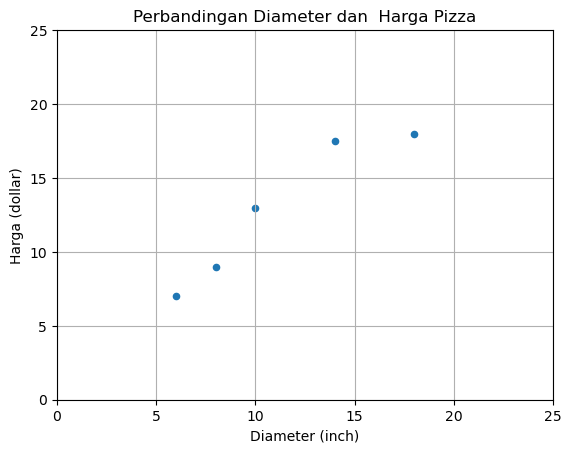

In [12]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan  Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [23]:
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x: {x}')
print(f'y: {y}')

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [25]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [27]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [32]:
X_vis = np.array ( [0, 25]) . reshape (-1 , 1)
y_vis = model.predict (X_vis)

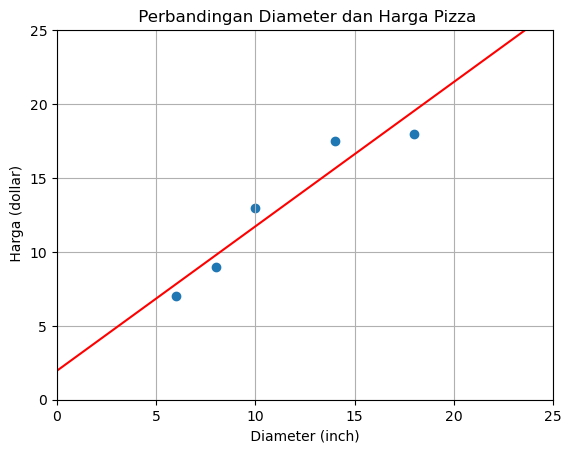

In [36]:
plt.scatter(x,y)
plt.plot (X_vis, y_vis, '-r')

plt.title (' Perbandingan Diameter dan Harga Pizza')
plt.xlabel (' Diameter (inch) ')
plt.ylabel (' Harga (dollar)')
plt.xlim (0, 25)
plt.ylim(0, 25)
plt.grid (True)
plt.show ()

In [46]:
print (f'intercept: {model.intercept_}')
print (f'slope: {model. coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


In [50]:
print(f'x:\n{x}\n')
print (f'x flatten: {x.flatten()}\n')
print (f'y: {y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


In [62]:
variance_x = np.var(x.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


In [64]:
np.cov(x.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [66]:
covariance_xy = np.cov(x.transpose(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


In [68]:
slope = covariance_xy / variance_x

print(f'slope:{slope}')

slope:0.976293103448276


In [70]:
intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept: {intercept}')

intercept: 1.9655172413793096


In [75]:
diameter_pizza = np.array ( [12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [77]:
prediksi_harga = model.predict (diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [91]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter:{dmtr} predilsi harga: {hrg}')


Diameter:[12] predilsi harga: 13.681034482758621
Diameter:[20] predilsi harga: 21.491379310344826
Diameter:[23] predilsi harga: 24.42025862068965


In [98]:
X_train = np.array ( [6, 8, 10, 14, 18]) .reshape (-1, 1)
y_train = np.array( [7, 9, 13, 17.5, 18])

X_test = np.array( [8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array ( [11, 8.5, 15, 18, 11])

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
from sklearn.metrics import r2_score
y_pred = model.predict (X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


In [108]:
ss_res=sum([(y_i-model.predict(x_i.reshape(-1,1))[0])**2
            for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [120]:
mean_y = np.mean(y_test)
ss_tot = sum=([(y_i-mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: [2.8899999999999975, 17.639999999999993, 5.290000000000004, 28.090000000000007, 2.8899999999999975]


In [122]:
r_squared = 1- (ss_res/ss_tot)

print(f'R-squared: {r_squared}')

R-squared: [-5.64294096 -0.08832763 -2.62913031  0.3165504  -5.64294096]
